In [ ]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Copy of written_name_test_v2 (1).csv')

In [ ]:
df.head()

,Image,Label
0,101.png,Television
1,102.png,Radio
2,103.png,Pen
3,104.png,Eraser
4,105.png,Tape


In [ ]:
dir='/content/drive/MyDrive/datasetMade'

In [ ]:
img_size_w = 400
img_size_h = 80

img_list = []

for img in os.listdir(dir):
  img_array = cv2.imread(os.path.join(dir,img), cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(img_array, (img_size_w,img_size_h))
  img_list.append((img,new_array))

In [ ]:
def get_array(name):
  for image,array in img_list:
    if name == image:
      return array

In [ ]:
df['Array'] = df['Image'].apply(get_array)


In [ ]:
df.head()


,Image,Label,Array
0,101.png,Television,"[[137, 137, 138, 138, 138, 139, 139, 139, 139,..."
1,102.png,Radio,"[[160, 160, 160, 159, 157, 158, 160, 161, 160,..."
2,103.png,Pen,"[[171, 171, 171, 173, 173, 173, 171, 170, 170,..."
3,104.png,Eraser,"[[167, 167, 167, 167, 167, 167, 167, 167, 167,..."
4,105.png,Tape,"[[171, 171, 171, 171, 171, 171, 171, 171, 171,..."


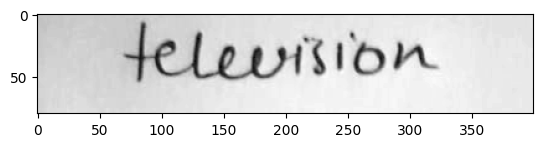

In [ ]:
plt.imshow(img_list[0][1], cmap='gray')


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [ ]:
df['Label_Class'] = df['Label']


In [ ]:
label_encoder = LabelEncoder()
df['Label_Class'] = label_encoder.fit_transform(df['Label_Class'])

In [ ]:
print('total classes', label_encoder.classes_)
print('total length of classes', len(label_encoder.classes_))
output_Classes = len(label_encoder.classes_)

total classes ['A' 'B' 'C' 'Chair' 'Creation' 'D' 'E' 'Eraser' 'F' 'File' 'H'
 'Handwritting' 'I' 'Install' 'Issue' 'J' 'K' 'L' 'Module' 'N' 'Not' 'P'
 'Pen' 'Phone' 'Q' 'R' 'Radio' 'Resolutn' 'Resolve' 'S' 'Showing' 'Tape'
 'Television' 'TenorFlow' 'Title' 'U' 'V' 'W' 'X' 'Y' 'Z' 'airplane'
 'apple' 'backpack' 'bag' 'banana' 'bathroom' 'battery' 'bed' 'bicycle'
 'blanket' 'blouse' 'book' 'box' 'bracelet' 'bridge' 'building' 'calender'
 'canvas' 'cap' 'car' 'card' 'charger' 'check' 'chimney' 'coat' 'conflict'
 'creation' 'curtain' 'dataset' 'desert' 'desk' 'door' 'dress' 'driveway'
 'earring' 'envelop' 'evaluation' 'fence' 'flower' 'folder' 'forest'
 'garden' 'gate' 'glasses' 'glove' 'glue' 'hat' 'headphone' 'install'
 'jacket' 'jeans' 'jupter' 'laptop' 'local' 'magazine' 'mailbox' 'model'
 'money' 'monitor' 'mountain' 'mouse' 'necklace' 'newspaper' 'ocean'
 'pants' 'paper' 'phone' 'picture' 'postcard' 'printer' 'purse' 'radio'
 'raincoat' 'request' 'rest' 'ring' 'river' 'roof' 'ruler'

In [ ]:
Label_classes = label_encoder.classes_
print(Label_classes)

['A' 'B' 'C' 'Chair' 'Creation' 'D' 'E' 'Eraser' 'F' 'File' 'H'
 'Handwritting' 'I' 'Install' 'Issue' 'J' 'K' 'L' 'Module' 'N' 'Not' 'P'
 'Pen' 'Phone' 'Q' 'R' 'Radio' 'Resolutn' 'Resolve' 'S' 'Showing' 'Tape'
 'Television' 'TenorFlow' 'Title' 'U' 'V' 'W' 'X' 'Y' 'Z' 'airplane'
 'apple' 'backpack' 'bag' 'banana' 'bathroom' 'battery' 'bed' 'bicycle'
 'blanket' 'blouse' 'book' 'box' 'bracelet' 'bridge' 'building' 'calender'
 'canvas' 'cap' 'car' 'card' 'charger' 'check' 'chimney' 'coat' 'conflict'
 'creation' 'curtain' 'dataset' 'desert' 'desk' 'door' 'dress' 'driveway'
 'earring' 'envelop' 'evaluation' 'fence' 'flower' 'folder' 'forest'
 'garden' 'gate' 'glasses' 'glove' 'glue' 'hat' 'headphone' 'install'
 'jacket' 'jeans' 'jupter' 'laptop' 'local' 'magazine' 'mailbox' 'model'
 'money' 'monitor' 'mountain' 'mouse' 'necklace' 'newspaper' 'ocean'
 'pants' 'paper' 'phone' 'picture' 'postcard' 'printer' 'purse' 'radio'
 'raincoat' 'request' 'rest' 'ring' 'river' 'roof' 'ruler' 'sandals'
 's

In [ ]:
import pickle
with open('/content/drive/MyDrive/label_classes', 'wb') as f:
  pickle.dump(Label_classes, f)

In [ ]:
df.head()


,Image,Label,Array,Label_Class
0,101.png,Television,"[[137, 137, 138, 138, 138, 139, 139, 139, 139,...",32
1,102.png,Radio,"[[160, 160, 160, 159, 157, 158, 160, 161, 160,...",26
2,103.png,Pen,"[[171, 171, 171, 173, 173, 173, 171, 170, 170,...",22
3,104.png,Eraser,"[[167, 167, 167, 167, 167, 167, 167, 167, 167,...",7
4,105.png,Tape,"[[171, 171, 171, 171, 171, 171, 171, 171, 171,...",31


In [ ]:
onehot = OneHotEncoder()
labels = onehot.fit_transform(df.Label_Class.values.reshape(-1,1)).toarray()

In [ ]:
import numpy as np

training_set = df['Array']
train_set = []

none_indices = []

for index, img in enumerate(training_set):
    if img is not None:
        img = img.reshape(img_size_w, img_size_h, 1)
        train_set.append(img)

    else:
        none_indices.append(index)

train_set = np.array(train_set)

# Summary of `None` values
none_count = len(none_indices)
print(f"Number of None values in training_set: {none_count}")

if none_indices:
    print(f"None values found at positions: {none_indices}")
else:
    print("No None values found in training_set")


Number of None values in training_set: 5
None values found at positions: [69, 70, 71, 102, 138]


In [ ]:
train_set.shape


(175, 400, 80, 1)

In [ ]:
train_labels = df.Label_Class.values

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [ ]:
i = Input(shape=(img_size_w,img_size_h,1))
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

x = GlobalMaxPooling2D()(x)

x = Flatten()(x)

x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(output_Classes, activation='softmax')(x)

In [ ]:
model = Model(i,x)

In [ ]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
r = model.fit(train_set,labels, epochs=5,batch_size=42, validation_split=0.2)


Epoch 1/5
4/4 [==============================] - 31s 7s/step - loss: 12.0901 - accuracy: 0.0000e+00 - val_loss: 9.4024 - val_accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 30s 7s/step - loss: 6.8128 - accuracy: 0.0214 - val_loss: 11.7545 - val_accuracy: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 31s 8s/step - loss: 5.7654 - accuracy: 0.0071 - val_loss: 14.3740 - val_accuracy: 0.0000e+00
Epoch 4/5
4/4 [==============================] - 29s 7s/step - loss: 5.3433 - accuracy: 0.0214 - val_loss: 17.8318 - val_accuracy: 0.0000e+00
Epoch 5/5
4/4 [==============================] - 28s 7s/step - loss: 4.9362 - accuracy: 0.0286 - val_loss: 19.4227 - val_accuracy: 0.0000e+00


In [ ]:
model.save('handwrite_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# img = '/content/drive/MyDrive/drive test/017.png'

In [ ]:
# img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
# new_array = cv2.resize(img_array, (img_size_w, img_size_h))
# array = new_array.reshape(-1, img_size_w, img_size_h, 1)
# pred = model.predict(array)
# y = np.argmax(pred)

In [ ]:
# print(y)
# label_encoder.classes_[y]

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the model
model = load_model('/content/handwrite_model.h5')

# Define the image path and expected input shape
img = '/content/drive/MyDrive/drive test/017.png'
img_size_w, img_size_h = 400, 80  # Expected input shape width and height

# Read and preprocess the image
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (img_size_w, img_size_h))
array = new_array.reshape(-1, img_size_w, img_size_h, 1)

# Predict and decode the prediction
pred = model.predict(array)
y = np.argmax(pred)

print(y)
# Assuming label_encoder is defined and fitted
print(label_encoder.classes_[y])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 [==============================] - 0s 450ms/step
120


NameError: name 'label_encoder' is not defined

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from google.colab import drive, files
from IPython.display import display, HTML

# Mount Google Drive
drive.mount('/content/drive')

# Load the model
model = load_model('/content/handwrite_model.h5')

# Function to predict image from file path
def predict_image(img_path, model, img_size_w=400, img_size_h=80):
    # Read and preprocess the image
    img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size_w, img_size_h))
    array = new_array.reshape(-1, img_size_w, img_size_h, 1)

    # Predict
    pred = model.predict(array)
    y = np.argmax(pred)
    return y

# Function to handle file upload
def handle_upload(content):
    with open('/content/uploaded_image.png', 'wb') as f:
        f.write(content)
    img_path = '/content/uploaded_image.png'
    return img_path

# HTML for file upload button
upload_html = """
<input type="file" name="file" id="file" accept=".png, .jpg, .jpeg">
"""

# Display the file upload button
print("Upload an image:")
display(HTML(upload_html))

# Wait for the user to upload an image
uploaded_file = files.upload()

# Get the uploaded file path
img_path = handle_upload(uploaded_file[next(iter(uploaded_file))])

# Predict and decode the prediction
y_pred = predict_image(img_path, model)
print("Predicted class index:", y_pred)
# Assuming label_encoder is defined and fitted
print("Predicted class:", label_encoder.classes_[y_pred])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Upload an image:


KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/handwrite_model.h5')

# Define the image size for resizing
img_size_w, img_size_h = 400, 80  # Expected input shape width and height

# Function to handle file selection and prediction
def predict_image():
    file_path = filedialog.askopenfilename()  # Open file dialog to select an image
    if file_path:
        # Read and preprocess the image
        img_array = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (img_size_w, img_size_h))
        array = new_array.reshape(-1, img_size_w, img_size_h, 1)

        # Predict
        pred = model.predict(array)
        y = np.argmax(pred)

        # Assuming label_encoder is defined and fitted
        predicted_label = label_encoder.classes_[y]
        print(f"Predicted Label: {predicted_label}")

        # Update GUI with predicted label
        label_output.config(text=f"Predicted Label: {predicted_label}")

# Create GUI
root = tk.Tk()
root.title("Handwriting Recognition")
root.geometry("400x200")

# Button to select an image file
browse_button = tk.Button(root, text="Browse Image", command=predict_image)
browse_button.pack(pady=20)

# Label to display predicted output
label_output = tk.Label(root, text="Predicted Label: None", font=("Helvetica", 16))
label_output.pack(pady=20)

root.mainloop()


TclError: no display name and no $DISPLAY environment variable